In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sn
# scikit-learn modules to create data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# keras modules to build model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

block_plot = False
matplotlib.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 7)

Inputs (X) shape: (100, 2)
Lables (y) shape: (100,)


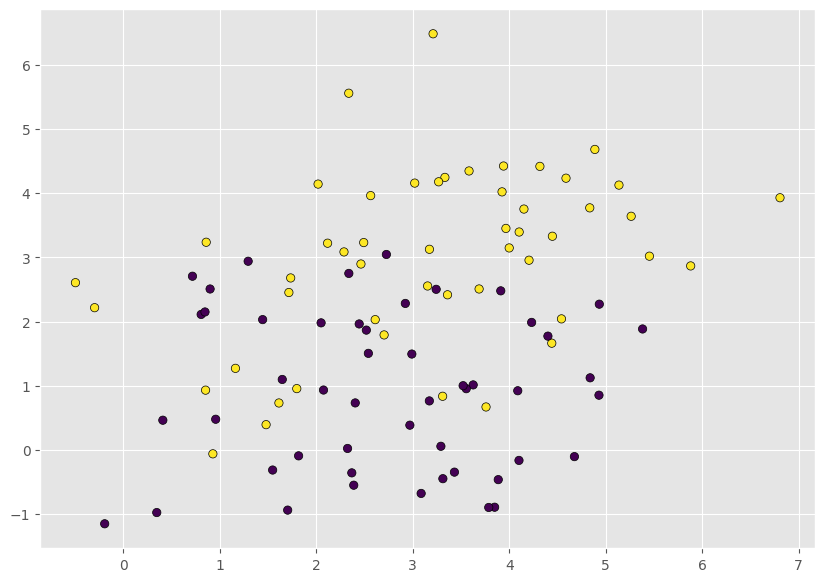

In [2]:
# Generate dataset
# Choose a random seed.
seed = 42
# Fix it for numpy and tensorflow calculations.
rng = np.random.RandomState(seed)
tf.random.set_seed(seed)

# Generate classification data as a set of points and their labels.
x, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=seed,
    n_clusters_per_class=1
)

# Add random uniform noise to the data.
x += 4 * rng.uniform(size=x.shape)

print('Inputs (X) shape: {}'.format(x.shape))
print('Lables (y) shape: {}'.format(y.shape))

plt.scatter(x[:,0], x[:,1],c=y,edgecolor='k');

In [3]:
# Create Logistic Regression Model
# two-class logistic regression model
def logistic_regression(train_input):
    logistic_regression_model = Sequential()

    # model consists of one layer and sigmoid activation
    logistic_regression_model.add(Dense(1, activation='sigmoid', input_dim=train_input.shape[1]))
    return logistic_regression_model

In [4]:
# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32),\
                   tf.convert_to_tensor(y_train, dtype=tf.float32)

x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32),\
                 tf.convert_to_tensor(y_test, dtype=tf.float32)



# define model
log_regression_model = logistic_regression(train_input=x_train)

# define optimizer
optimizer = SGD(learning_rate=0.01)


# set optimizer, loss and metrics for our training
log_regression_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# initialize and start training
log_regression_model.fit(epochs=100, x=x_train, y=y_train)

# get predicted labels after training is done
y_predicted = log_regression_model.predict(x_test)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6153 - loss: 0.7587 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6258 - loss: 0.7184
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6403 - loss: 0.6837
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6403 - loss: 0.6541
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6587 - loss: 0.6288
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6838 - loss: 0.6074 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6838 - loss: 0.5892
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6943 - loss: 0.5739
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7127 - loss: 0.5609
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7311 - loss: 0.5499
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7378 - loss: 0.5407
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7378 - loss: 0.5329

In [5]:
# Confusion Matirx
def confusion_matrix(TP, FP, FN, TN):
        """
        get confusion matrix as defined in figure
        """
        cm = np.array([[TP, FP],
                      [FN, TN]])

        num_p = TP + FP
        num_n = TN + FN

        cm_norm = np.array([[TP/num_p, FP/num_p],
                            [FN/num_n, TN/num_n]])
        return cm, cm_norm

def get_tp_fp_tn_fn(thres_prob=0.5):
    TP = tf.keras.metrics.TruePositives(
        thresholds=thres_prob, name=None, dtype=None
    )
    TP.update_state(y_test, y_predicted)
    FP = tf.keras.metrics.FalsePositives(
        thresholds=thres_prob, name=None, dtype=None
    )
    FP.update_state(y_test, y_predicted)
    TN = tf.keras.metrics.TrueNegatives(
        thresholds=thres_prob, name=None, dtype=None
    )
    TN.update_state(y_test, y_predicted)
    FN = tf.keras.metrics.FalseNegatives(
        thresholds=thres_prob, name=None, dtype=None
    )
    FN.update_state(y_test, y_predicted)
    return TP.result().numpy(), FP.result().numpy(), FN.result().numpy(), TN.result().numpy()

Confusion Matrix for threshold probability 0.5


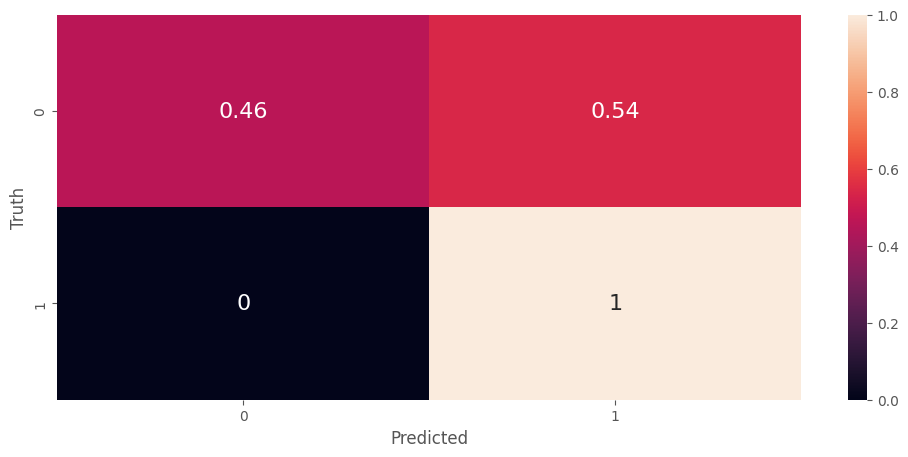

Confusion Matrix for threshold probability 0.6


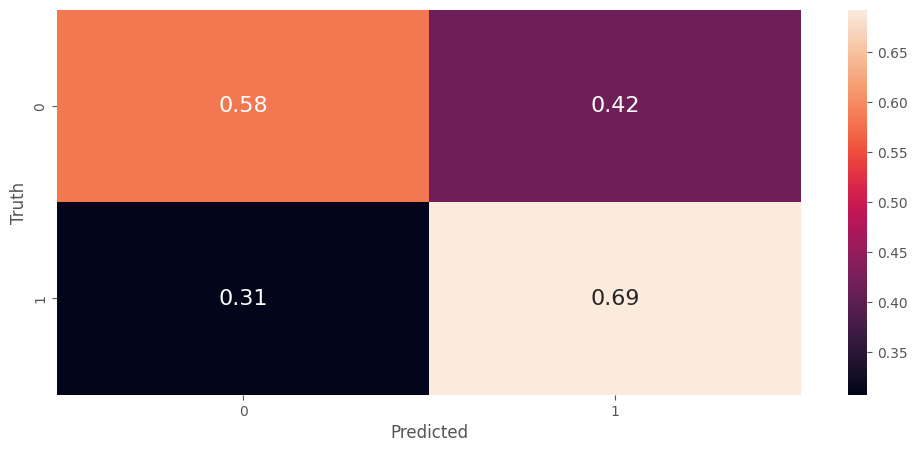

In [6]:
# threshold probability 0.5
tp, fp, fn, tn = get_tp_fp_tn_fn(0.1)
print('Confusion Matrix for threshold probability 0.5')
cm, cm_norm = confusion_matrix(tp, fp, fn, tn)



plt.figure(figsize=[12, 5])
sn.heatmap(cm_norm, annot=True, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# threshold probability 0.6
tp, fp, fn, tn = get_tp_fp_tn_fn(0.6)
print('Confusion Matrix for threshold probability 0.6')
cm, cm_norm = confusion_matrix(tp, fp, fn, tn)

plt.figure(figsize=[12, 5])
sn.heatmap(cm_norm, annot=True, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


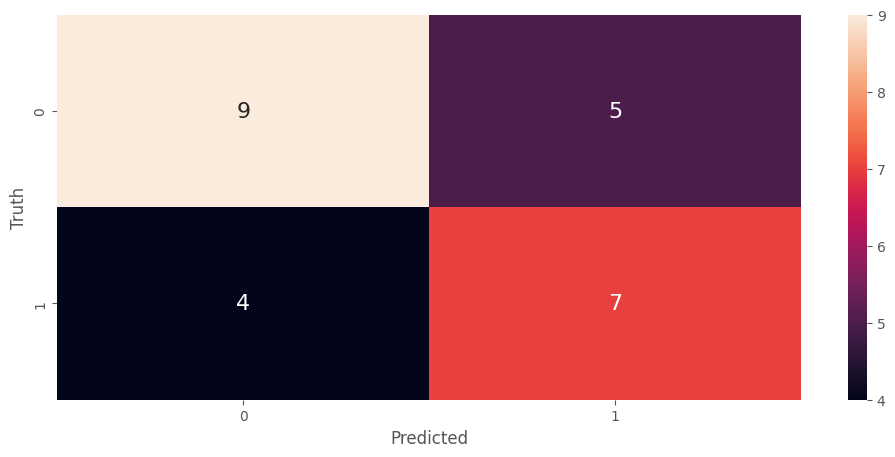

In [7]:
preds = tf.cast(y_predicted>0.5, dtype=tf.float32)

cm = tf.math.confusion_matrix(y_test, preds)

plt.figure(figsize=[12, 5])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [8]:
# Accuracy
preds = tf.cast(y_predicted >= 0.5, dtype=tf.float32)
accuracy = tf.keras.metrics.binary_accuracy(tf.expand_dims(y_test, 1), y_predicted, threshold=0.5)
print(f"Accuracy at threshold 0.5: {tf.reduce_mean(accuracy).numpy()}")

Accuracy at threshold 0.5: 0.6399999856948853


In [9]:
# Precision
threshold = 0.5
precision = tf.keras.metrics.Precision(thresholds=threshold)
precision.update_state(y_test, y_predicted)
print(f"Precision at threhold 0.5: {precision.result().numpy()}")

Precision at threhold 0.5: 0.5833333134651184


In [10]:
# Recall / Sensitivity
threshold = 0.5
precision = tf.keras.metrics.Recall(thresholds=threshold)
precision.update_state(y_test, y_predicted)
print(f"Recall at threhold 0.5: {precision.result().numpy()}")

Recall at threhold 0.5: 0.6363636255264282


In [11]:
# F-1 Score
thres_prob = 0.5
predictions = y_predicted > thres_prob
tp, fp, fn, tn = get_tp_fp_tn_fn(thres_prob)
f1_score = (2*tp)/(2*tp + fp + fn)
print(f"F1-Score at threhold 0.5: {f1_score}")

F1-Score at threhold 0.5: 0.6086956262588501


In [12]:
# ROC Curve
thresholds = np.linspace(0.001, 0.999, 1000)
len(thresholds)

1000

In [13]:
auc = tf.keras.metrics.AUC(thresholds=thresholds)
auc.update_state(y_test, y_predicted)
print(f"AUC: {auc.result().numpy()}")

AUC: 0.7597402334213257


In [14]:
tpr_list, fpr_list = [], []
for threshold in thresholds:
    # get TP, FP, FN, and TN to calculate TPR and FPR
    tp, fp, fn, tn = get_tp_fp_tn_fn(threshold)

    # Sensitivity, recall, or true positive rate
    tpr = tp / (tp + fn)
    tpr_list.append(tpr)

    # False positive rate
    fpr = fp / (fp + tn)
    fpr_list.append(fpr)

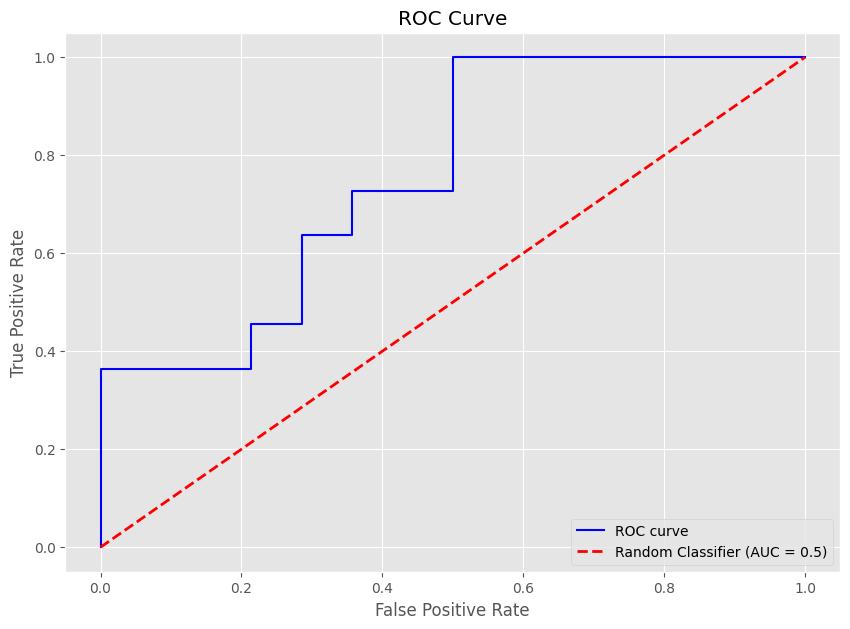

In [15]:
plt.plot(fpr_list, tpr_list, label='ROC curve', color='b')
plt.plot([0, 1], [0, 1], label='Random Classifier (AUC = 0.5)', linestyle='--', lw=2, color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show(block=block_plot)